<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning /Titanic/titanic_train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning /Titanic/titanic_test.csv")

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Cleaning


In [5]:
# We need to drop name and embraked where passengers boarded from.
train =train.drop(["Name", "Embarked"], axis="columns")
test =test.drop(["Name", "Embarked"], axis="columns")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN


In [6]:
#Checking unique counts in Ticket column
cols=[]
len(train)
for val in train['Ticket']:
  if val not in cols:
    cols.append(val)
len(cols)

681

In [7]:
# We need to drop Ticket column as well, having 681 different tickets doesnt help out.
train = train.drop(["Ticket"], axis="columns")
test = test.drop(["Ticket"], axis="columns")


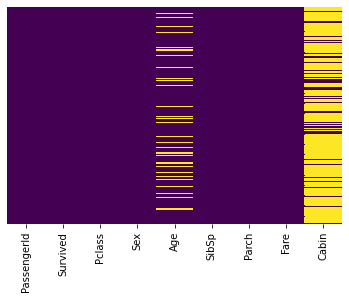

In [8]:
#Checking misssing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# We need to drop cabin since more than half is missing
train =train.drop(["Cabin"], axis="columns")
test =test.drop(["Cabin"], axis="columns")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [10]:
#Imputing missing variables based on Pclass
means_train = train.groupby('Pclass').mean()
means_test = test.groupby('Pclass').mean()
means_train


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
#Mean of Ages
m1_tr = means_train['Age'][1]
m2_tr= means_train['Age'][2]
m3_tr = means_train['Age'][3]
m1_te = means_test['Age'][1]
m2_te= means_test['Age'][2]
m3_te = means_test['Age'][3]

In [12]:
train.loc[(train['Pclass'] == 1) & (train['Age'].isnull()), 'Age'] = m1_tr
train.loc[(train['Pclass'] == 2) & (train['Age'].isnull()), 'Age'] = m2_tr
train.loc[(train['Pclass'] == 3) & (train['Age'].isnull()), 'Age'] = m3_tr
test.loc[(test['Pclass'] == 1) & (test['Age'].isnull()), 'Age'] = m1_te
test.loc[(test['Pclass'] == 2) & (test['Age'].isnull()), 'Age'] = m2_te
test.loc[(test['Pclass'] == 3) & (test['Age'].isnull()), 'Age'] = m3_te


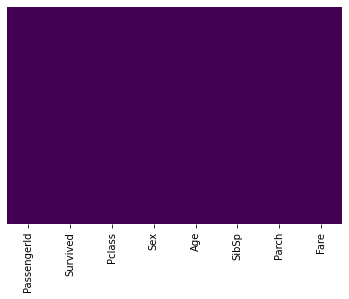

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Converting Categorical Features

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [15]:
df = pd.get_dummies(train,columns=["Pclass", "Sex", "SibSp", "Parch"], drop_first=False)
df 

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,22.00000,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,2,1,38.00000,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,26.00000,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,1,35.00000,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,35.00000,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.00000,13.0000,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
887,888,1,19.00000,30.0000,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
888,889,0,25.14062,23.4500,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
889,890,1,26.00000,30.0000,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


Building Model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived",axis=1), df['Survived'], test_size=0.2, random_state=111)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = logistic.predict(X_test)


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       113
           1       0.73      0.70      0.71        66

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
cm=confusion_matrix(y_test, predictions)

In [25]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Survived', 'Not Survived'])

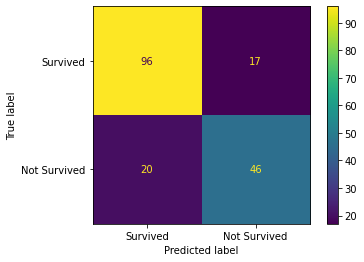

In [26]:
cmd_obj.plot()